# Introduction

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import math
from sklearn.model_selection import train_test_split

Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not.

- It essentially is an extension of regression, but is used in classification tasks. Instead of trying to predict output from a large range of numbers, the output here will always be **0 or 1.**
- Here, what we do is we set a value known as a **threshold value**. For our example, if we set this threshold value to be 0.5. If the model outputs a value below 0.5, it is classified as 0; whereas if it gives a value above 0.5, it is classified as 1.

Let's begin with understanding the concept of logistic regression.

# Sigmoid Function

Sigmoid is a mathematical function that maps any **real-valued number into a value between 0 and 1**. Its characteristic “S”-shaped curve makes it particularly useful in scenarios where we need to convert **outputs into probabilities**. This function is often called the logistic function.

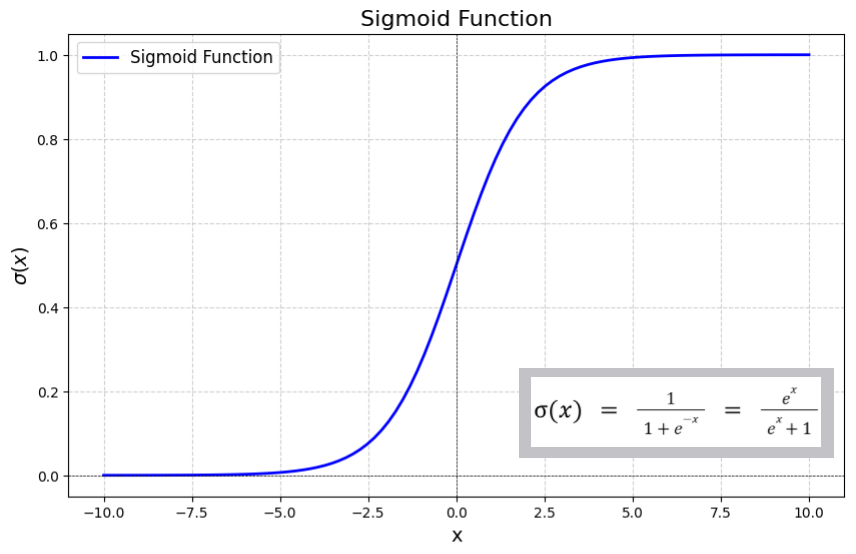

Sigmoid function is used as an activation function in machine learning and neural networks for modeling binary classification problems, smoothing outputs, and introducing non-linearity into models.

In [8]:
# Input is an array.
input_array = np.array([1,2,3])
exp_array = np.exp(input_array)

print("Input to exp:", input_array)
print("Output of exp:", exp_array)

# Input is a single number
input_val = 1
exp_val = np.exp(input_val)

print("Input to exp:", input_val)
print("Output of exp:", exp_val)

Input to exp: [1 2 3]
Output of exp: [ 2.718  7.389 20.086]
Input to exp: 1
Output of exp: 2.718281828459045


In [9]:
def sigmoid(z):
    """ Compute the sigmoid of z -
    Args:
        z (ndarray): A scalar, numpy array of any size.
    Returns:
        g (ndarray): sigmoid(z), with the same shape as z. """

    g = 1/(1+np.exp(-z))
    return g

The code below uses the defined sigmoid function to show what values generated by a sigmoid function look like for a given array.

In [10]:
# an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,11)

# use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3)
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


# Logistic Loss Function

## Squared error for logistic regression?
Recall for **Linear** Regression we have used the **squared error cost function**:
The equation for the squared error cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

where
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

This cost function worked well for linear regression, it is natural to consider it for logistic regression as well. However, as the slide above points out, $f_{wb}(x)$ now has a non-linear component, the sigmoid function:   $f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$.   Let's try a squared error cost on the example:

In [11]:
def plt_simple_example(x_train, y_train):
    plt.figure(figsize=(6,4))
    plt.scatter(x_train, y_train, color='blue', label="Training Data")
    plt.xlabel("Feature X")
    plt.ylabel("Target Y")
    plt.title("Simple Logistic Regression Example")
    plt.legend()
    plt.grid(True)
    plt.show()

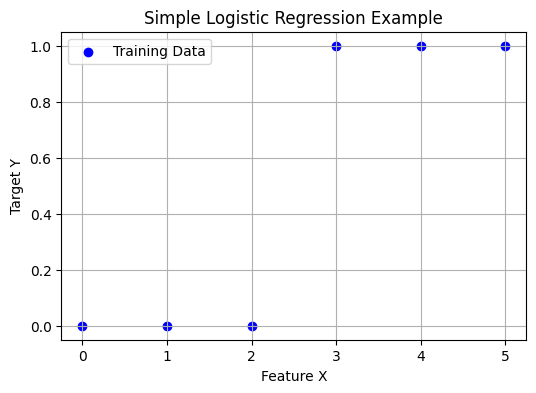

In [12]:
x_train = np.array([0., 1, 2, 3, 4, 5],dtype=np.longdouble)
y_train = np.array([0,  0, 0, 1, 1, 1],dtype=np.longdouble)
plt_simple_example(x_train, y_train)

In [13]:
from mpl_toolkits.mplot3d import Axes3D

def plt_logistic_squared_error(x_train, y_train):
    w_vals = np.linspace(-10, 10, 100)
    b_vals = np.linspace(-10, 10, 100)
    W, B = np.meshgrid(w_vals, b_vals)

    J_vals = np.zeros(W.shape)

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            w = W[i, j]
            b = B[i, j]
            predictions = 1 / (1 + np.exp(-(w * x_train + b)))
            J_vals[i, j] = np.mean(0.5 * (predictions - y_train) ** 2)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(W, B, J_vals, cmap='viridis')
    ax.set_xlabel("Weight (w)")
    ax.set_ylabel("Bias (b)")
    ax.set_zlabel("Cost J(w, b)")
    ax.set_title("Squared Error Cost Surface for Logistic Regression")
    plt.show()

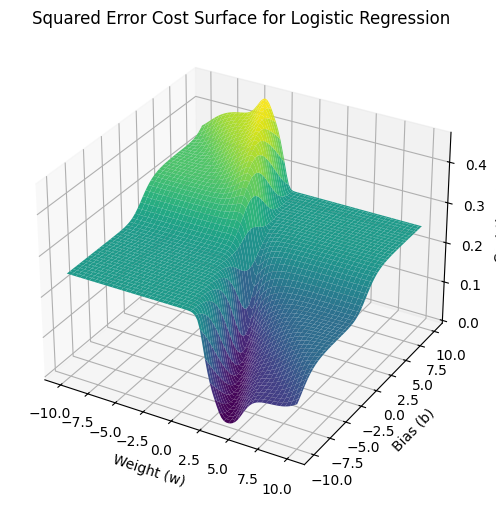

In [14]:
plt.close('all')
plt_logistic_squared_error(x_train,y_train)
plt.show()

Logistic regression requires a cost function more suitable to its non-linear nature. This starts with a Loss function. This is described below.

Logistic Regression uses a loss function more suited to the task of categorization where the target is 0 or 1 rather than any number.

**Loss** is a measure of the difference of a single example to its target value while the  
**Cost** is a measure of the losses over the training set


This is defined:
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.

The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target is zero or ($y=0$) and another for when the target is one ($y=1$). Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target. Consider the curves below:

In [15]:
def logistic_loss(y_true, y_pred):
    """
    Computes logistic loss for a single example.

    Args:
      y_true (scalar) : Actual target value (0 or 1)
      y_pred (scalar) : Predicted probability (sigmoid output)

    Returns:
      loss (scalar)   : Logistic loss for the example
    """
    epsilon = 1e-9  # Small value to prevent log(0) errors
    loss = - (y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))
    return loss

The logistic loss function above defines the condition for logistic loss.

In [16]:
def visualize_logistic_loss():
    y_true_0 = 0
    y_true_1 = 1
    y_pred = np.linspace(0.01, 0.99, 100)

    loss_0 = -np.log(1 - y_pred)
    loss_1 = -np.log(y_pred)

    plt.figure(figsize=(8, 5))
    plt.plot(y_pred, loss_0, label="Loss when y=0", color="blue")
    plt.plot(y_pred, loss_1, label="Loss when y=1", color="red")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Logistic Loss")
    plt.title("Logistic Loss Visualization")
    plt.legend()
    plt.grid()
    plt.show()

The diagram below shows us the two separate curves for loss when y=0 and y=1.

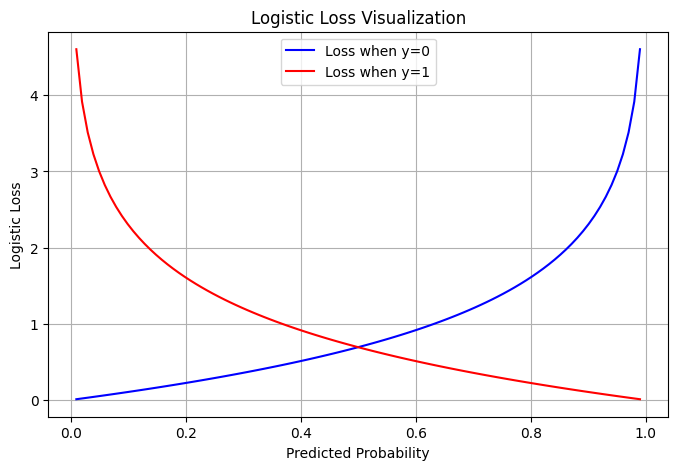

In [17]:
visualize_logistic_loss()

# Logistic Cost Function

Computing the cost for the logistic function is as follows:

In [18]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost / m
    return cost

The compute_cost_logistic() function calculates the logistic regression cost, which measures how well the model's predictions match the actual target values.
- It takes as input the dataset X (with m examples and n features), the target values y, model parameters w (weights), and b (bias).
- For each example, it computes the linear combination z = X[i]·w + b, applies the sigmoid function to get the predicted probability, and then calculates the loss using the logistic loss formula: -y[i] * log(f_wb_i) - (1 - y[i]) * log(1 - f_wb_i).
- The total cost is averaged over all examples to obtain the final cost value, which helps evaluate the model’s performance.

Testing out the cost function:

In [19]:
X_sample = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_sample = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

In [20]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_sample, y_sample, w_tmp, b_tmp))

0.36686678640551745


In [21]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_sample, y_sample, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_sample, y_sample, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


# Gradient Descent

Computing gradient:

In [22]:
def compute_gradient_logistic(X, y, w, b):
    """
    Computes the gradient for logistic regression

    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    return dj_db, dj_dw

The function `compute_gradient_logistic` calculates the gradients of the logistic regression cost function with respect to the weight vector \( w \) and bias \( b \).
What it does:
- It iterates over all training examples, computes the predicted probability using the sigmoid function, and calculates the error between predictions and actual labels.
- The gradient updates for each feature are accumulated across all samples, and the final values are averaged over the dataset to ensure smooth updates.
- These gradients help determine the direction in which \( w \) and \( b \) should be adjusted during gradient descent to minimize the logistic loss.

In [23]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


Defining the gradient descent function for logistic regression:

In [24]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Performs batch gradient descent

    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

    return w, b, J_history         #return final w,b and J history for graphing


# Implementation

Let's begin with experimenting on a dataset with information on diabetes patients. In this notebook, you will learn how to predict whether a patient would be diagnosed with diabetes or not depending on user data.

In [25]:
dataset = pd.read_csv('titanic')

# Data preprocessing

In [26]:
dataset.shape

(1424, 11)

In [27]:
dataset.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,class,alone,embarked
0,0,0,3,1,22.0,1,0,7.2500,Third,False,0
1,1,1,1,0,38.0,1,0,71.2833,First,False,1
2,2,1,3,0,26.0,0,0,7.9250,Third,True,0
3,3,1,1,0,35.0,1,0,53.1000,First,False,0
4,4,0,3,1,35.0,0,0,8.0500,Third,True,0


## Data cleaning

In [28]:
dataset.drop(['Unnamed: 0'], axis = 1)

,survived,pclass,sex,age,sibsp,parch,fare,class,alone,embarked
0,0,3,1,22.000000,1,0,7.250000,Third,False,0
1,1,1,0,38.000000,1,0,71.283300,First,False,1
2,1,3,0,26.000000,0,0,7.925000,Third,True,0
3,1,1,0,35.000000,1,0,53.100000,First,False,0
4,0,3,1,35.000000,0,0,8.050000,Third,True,0
...,...,...,...,...,...,...,...,...,...,...
1419,0,3,1,23.849017,1,2,20.245466,Third,False,0
1420,0,2,1,22.651495,0,0,14.721553,Second,True,1
1421,1,3,1,44.947037,0,0,6.849733,Third,True,0
1422,1,2,1,6.953685,1,1,37.401368,Second,False,0


Checking for null and duplicate values:

In [29]:
dataset.isnull().sum()

,0
Unnamed: 0,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
class,0
alone,0


As we can see, the dataset does not have any null values.

In [30]:
dataset.duplicated().sum()

np.int64(0)

This dataset has has 0 duplicate values.

In [31]:
print("Final dataset shape: ", dataset.shape)

Final dataset shape:  (1424, 11)


In [32]:
dataset.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,class,alone,embarked
0,0,0,3,1,22.0,1,0,7.2500,Third,False,0
1,1,1,1,0,38.0,1,0,71.2833,First,False,1
2,2,1,3,0,26.0,0,0,7.9250,Third,True,0
3,3,1,1,0,35.0,1,0,53.1000,First,False,0
4,4,0,3,1,35.0,0,0,8.0500,Third,True,0


Now that we have our final cleaned dataset, we need to convert any non numeric values to numeric values for the model to understand.

In [33]:
dataset = pd.get_dummies(dataset, columns=['class', 'alone'], dtype=float)

You can also look into One Hot Encoder or Label Encoding for the same purpose.

In [34]:
dataset.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class_First,class_Second,class_Third,alone_False,alone_True
0,0,0,3,1,22.0,1,0,7.2500,0,0.0,0.0,1.0,1.0,0.0
1,1,1,1,0,38.0,1,0,71.2833,1,1.0,0.0,0.0,1.0,0.0
2,2,1,3,0,26.0,0,0,7.9250,0,0.0,0.0,1.0,0.0,1.0
3,3,1,1,0,35.0,1,0,53.1000,0,1.0,0.0,0.0,1.0,0.0
4,4,0,3,1,35.0,0,0,8.0500,0,0.0,0.0,1.0,0.0,1.0


In [35]:
dataset.shape

(1424, 14)

# Exploratory Data Analysis

### Summary Statistics  

In [36]:
print("\nSummary Statistics:")
print(dataset.describe())


Summary Statistics:
        Unnamed: 0     survived       pclass          sex          age  \
count  1424.000000  1424.000000  1424.000000  1424.000000  1424.000000   
mean    711.500000     0.404494     2.240169     0.636236    29.591195   
std     411.217704     0.490966     0.836560     0.481251    14.526953   
min       0.000000     0.000000     1.000000     0.000000    -1.599368   
25%     355.750000     0.000000     1.000000     0.000000    20.021711   
50%     711.500000     0.000000     2.000000     1.000000    28.075904   
75%    1067.250000     1.000000     3.000000     1.000000    38.071701   
max    1423.000000     1.000000     3.000000     1.000000    81.369592   

             sibsp        parch         fare     embarked  class_First  \
count  1424.000000  1424.000000  1424.000000  1424.000000  1424.000000   
mean      0.514045     0.432584    34.541764     0.261236     0.258427   
std       0.930365     0.853881    52.928327     0.521377     0.437924   
min       0.0000

This table provides key insights into the dataset, including the count, mean, standard deviation, and range (min-max) of each feature. It helps in understanding the distribution, presence of outliers, and overall data characteristics.  


<ipython-input-37-042f7456fac0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=dataset, palette="pastel")


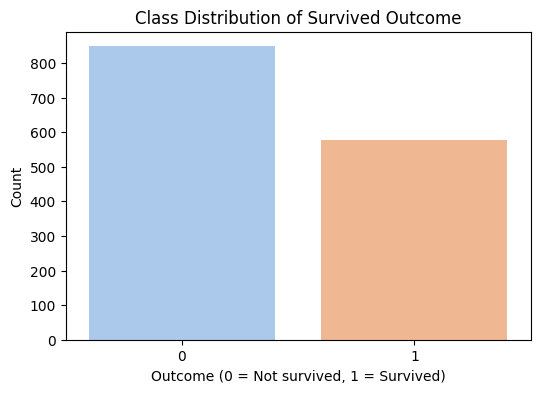

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=dataset, palette="pastel")
plt.title("Class Distribution of Survived Outcome")
plt.xlabel("Outcome (0 = Not survived, 1 = Survived)")
plt.ylabel("Count")
plt.show()

The above diagram helps us visualize the class outcomes of the dataset - essentially the number of data samples with an outcome 0 (no diabetes) or 1 (diagnosed with diabetes).

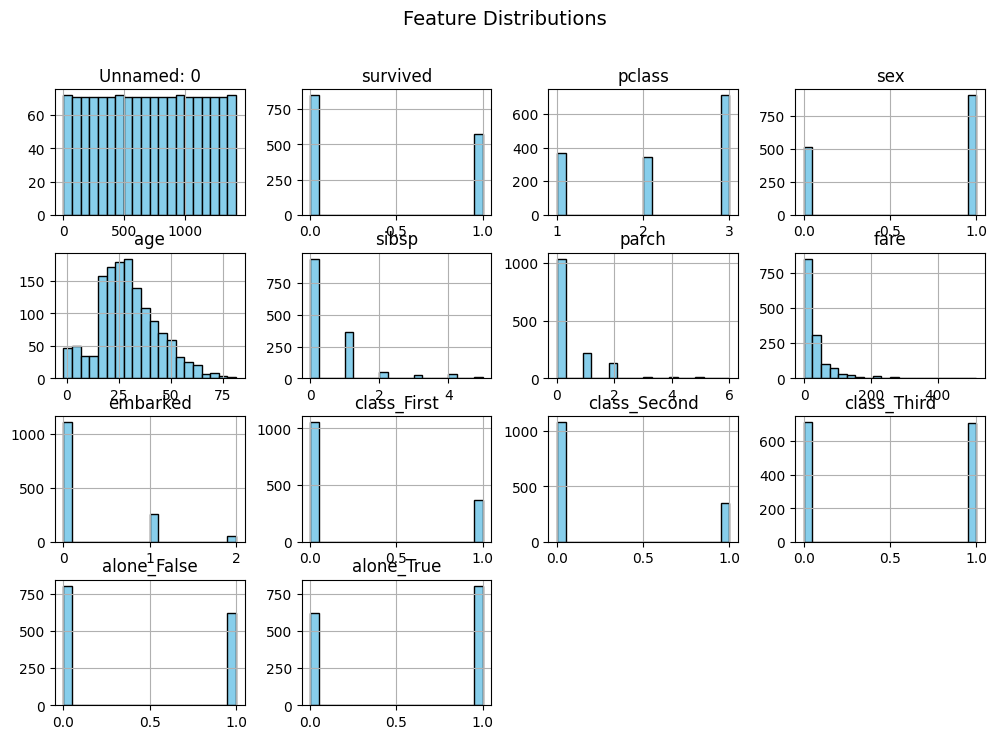

In [38]:
dataset.hist(figsize=(12,8), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

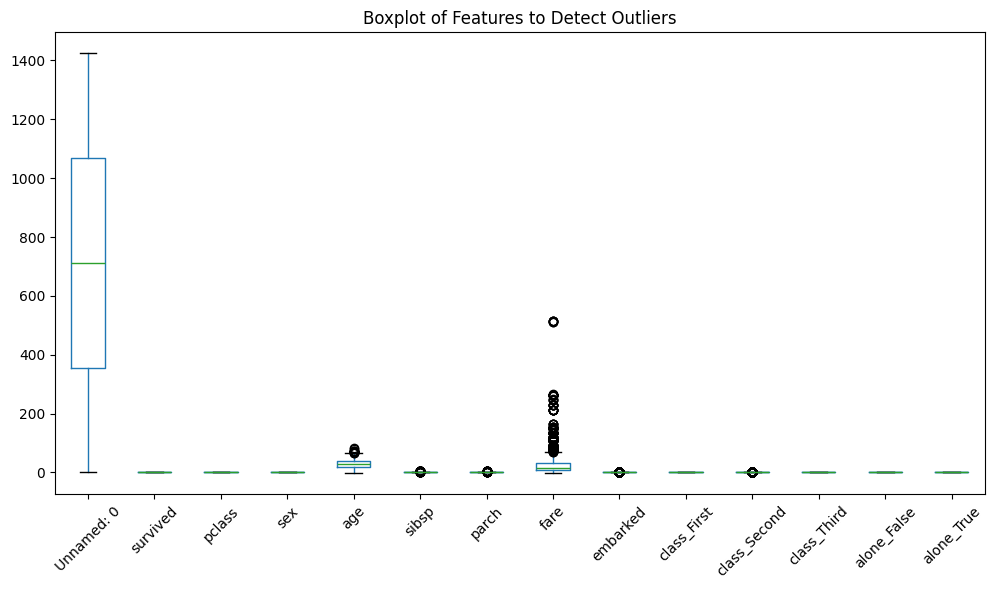

In [39]:
plt.figure(figsize=(12,6))
dataset.boxplot(rot=45, grid=False)
plt.title("Boxplot of Features to Detect Outliers")
plt.show()

# Applying Logistic Regression

In [40]:
X = dataset.drop(columns=['survived']).values
y = dataset['survived'].values

The code below splits our dataset into training set (75%) and test set (25%).

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Since we have written our functions considering input as numpy arrays, we will convert X_train and y_train to numpy arrays.

In [42]:
print(X_train.shape)  # Should be (m, n)
print(y_train.shape)  # Should be (m,)

(1068, 13)
(1068,)


Initializing weights and bias:

In [43]:
w_init = np.zeros(X_train.shape[1])
b_init = 0.0

alpha = 0.01
num_iters = 1000

Implementing gradient descent to find final weight, final bias and J_history.

In [44]:
w_final, b_final, J_history = gradient_descent(X_train, y_train, w_init, b_init, alpha, num_iters)

<ipython-input-9-90ee4d61337e>:8: RuntimeWarning: overflow encountered in exp
  g = 1/(1+np.exp(-z))
<ipython-input-18-4433b24bcab4>:20: RuntimeWarning: divide by zero encountered in log
  cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
<ipython-input-18-4433b24bcab4>:20: RuntimeWarning: invalid value encountered in scalar multiply
  cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)


Iteration    0: Cost nan   
Iteration  100: Cost nan   
Iteration  200: Cost nan   
Iteration  300: Cost nan   
Iteration  400: Cost nan   
Iteration  500: Cost nan   
Iteration  600: Cost nan   
Iteration  700: Cost nan   
Iteration  800: Cost nan   
Iteration  900: Cost nan   


In [45]:
def predict(X, w, b):
    m = X.shape[0]
    preds = np.zeros(m)

    for i in range(m):
        z_i = np.dot(X[i], w) + b
        preds[i] = 1 if sigmoid(z_i) >= 0.5 else 0  # Threshold at 0.5

    return preds

In [46]:
y_pred = predict(X_test, w_final, b_final)

<ipython-input-9-90ee4d61337e>:8: RuntimeWarning: overflow encountered in exp
  g = 1/(1+np.exp(-z))


When we implement logistic regression from scratch, one of the core mathematical operations is computing the sigmoid function.
​

Here, z = w·x + b, which is a linear combination of the input features. The sigmoid function converts any real number into a value between 0 and 1 — ideal for classification probabilities.

However, during training (especially using gradient descent), the value of z can become very large or very negative. When z is a large negative number (e.g., -1000), np.exp(-z) becomes np.exp(1000) — a number too large for Python to handle numerically. This causes an overflow, resulting in the warning you can see above.

**What Causes This?**
Unscaled features: If the dataset contains values with widely varying ranges (e.g., age vs. blood sugar levels), the weights can grow excessively during gradient descent.

Large learning rate (alpha): Causes weights to change too drastically, again leading to large z values.

This brings us to using scikit learn.